# Clustering

In questo laboratorio vedermo come implementare il clustering in Python. A differenza degli altri metodi che abbiamo visto negli scorsi laboratori, il custering è un metodo di learning unsupervised, cioè non vengono usate le etichette di classe

In [1]:
# Installiamo:
#1) scprep, ossia un framework  per caricare, preelaborare e disegnare matrici in Python;
#2) graphtool e louvain per confrontare k-means con altri algoritmi di clustering
!pip install scprep graphtools louvain

  Obtaining dependency information for scprep from https://files.pythonhosted.org/packages/2a/d2/72a06c97668b07ef703ffdc392cbd5ce004733d14978f6ae2ae71a09df41/scprep-1.2.3-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 1.0 MB/s eta 0:00:00
  Obtaining dependency information for louvain from https://files.pythonhosted.org/packages/aa/aa/56d95e24258d35475afb056e30a5f711581e0dbb216bd756dbd2bccb49db/louvain-0.8.1-cp311-cp311-macosx_11_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 6.8 MB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for Deprecated from https://files.pythonhosted.org/packages/20/8d/778b7d51b981a96554f29136cd59ca7880bf58094338085bcf2a979a0e6a/Deprecated-1.2.14-py2.py3-none-any.whl.metadata
  Obtaining dependency information for igraph<0.11,>=0.10.0 from https://files.pythonhosted.org/packages/38/d8/0abcc30c61d60fdd460677b3ca1d6ac16f4a657d50eea8f461da76396e27/igraph-0.10.8-cp39-abi3-macosx_11_0_ar

## Creiamo il dataset

/var/folders/d2/t7yz1tvn4q96z1st5_f71cgr0000gn/T/ipykernel_9484/3323575304.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


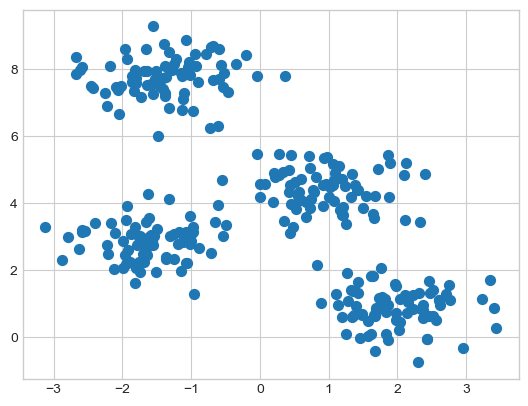

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

## L'algoritmo K-Means

L'algoritmo $K$-means divide un insieme di $N$ campioni $X$ in $K$ cluster disgiunti $C$, ciascuno descritto dalla media $\mu_j$ dei campioni nel cluster. Le medie sono comunemente chiamate **“centroidi” del cluster**; si noti che non sono, in generale, punti del dataset $X$, sebbene vengano rappresentati nello stesso spazio. L'algoritmo K-means mira a scegliere i centroidi che riducono al minimo la somma dei quadrati all'interno del cluster (inerzia):

$$\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_j - \mu_i||^2)$$

## Come funziona l'algoritmo

L'algoritmo  K-mean utilizza un meccanismo di perfezionamento iterativo per produrre i cluster finali. Gli input dell'algoritmo sono il numero di cluster $Κ$ e il set di dati. K-Means  inizializza i $Κ$ centroidi iniziali, che possono essere generati casualmente o selezionati casualmente dal set di dati. L'algoritmo quindi ripete due passaggi:

**Assegnamento**: ciascun centroide definisce uno dei cluster. In questo passaggio, ciascun punto viene assegnato al centroide più vicino, in base alla distanza euclidea. Più formalmente, se $c_i$ è l'insieme dei centroidi nell'insieme $C$, allora ogni punto dati $x$ viene assegnato a un cluster in base al seguente criterio:

$$\underset{c_i \in C}{\arg\min} \; dist(c_i,x)^2$$

dove dist( · ) è la distanza euclidea standard ($L_2$).

**Aggiornamento dei centroidi**: in questo step i centroidi vengono ricalcolati. Sia $S_i$ l'insieme degli assegnamenti dei punti rispetto a ciascun per centroide del cluster.L'aggiornamento avviene stiamndo la media di tutti i punti  assegnati al medesimo cluster.

$$c_i=\frac{1}{|S_i|}\sum_{x_i \in S_i x_i}$$

L'algoritmo ripete i due step fino a convergenza, ossia nessun punto modifica il suo assegnamento tra iterazioni successive (la somma delle distanze è ridotta al minimo) o viene raggiunto un numero massimo di iterazioni.

**Convergenza e inizializzazione casuale**

È garantito che questo algoritmo converga verso un punto di minimo. Il risultato può essere un ottimo locale, il che significa che la valutazione di più di un'esecuzione dell'algoritmo con centroidi iniziali randomizzati può fornire un risultato migliore.

<img src=https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif style="width: 500px;"/>


## Come valutare K-means in pratica

Applichiamo K-means con un numero di cluster K variabile. Successivamente, per ogni valore di K, andiamo a valutare la somma delle distanze quadrate tra i punti e il centroide del cluster (ovvero quello che in Sklearn si chiama "inerzia").

L'inerzia misura quanto bene un set di dati è stato raggruppato per mezzo dell'algoritmo K-Means. Viene calcolato misurando la distanza tra ciascun punto e il relativo centroide, e sommando le i quadrati delle distanze.

$$\sum_{i=0}^{n}||x_j - \mu_i||^2$$

Un buon modello è quello con bassa inerzia e un ridotto numero di cluster (K). Tuttavia, questo è un compromesso perché all'aumentare di K, l'inerzia diminuisce.

Per trovare il K ottimale per un set di dati, si utilizza il metodo Elbow, che consiste nel trovare il punto in cui la diminuzione dell'inerzia inizia a rallentare.

/Users/davide/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/davide/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/davide/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/davide/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

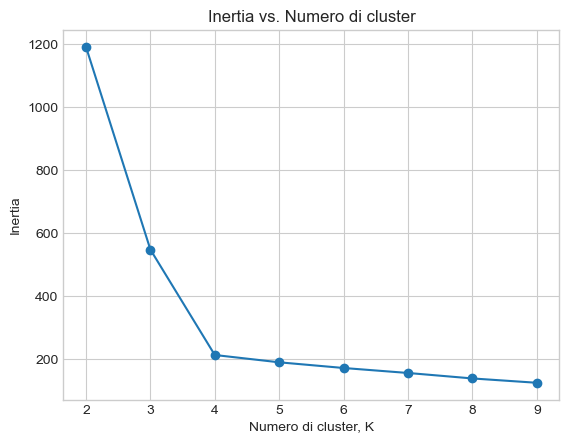

In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Applica K-means con un numero di cluster variabile
k_values = range(2, 10)
inertias = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Mostra i risultati al variare di K con uno scatter plot
plt.plot(k_values, inertias, '-o')
plt.xlabel('Numero di cluster, K')
plt.ylabel('Inertia')
plt.title('Inertia vs. Numero di cluster')
plt.show()

Scegliamo k=4 numero di cluster, usando l'elbow method. In sostanza, k=4 è un buon numero di cluster in quanto già con k=5 l'inerzia non diminuisce più di tanto.

Plottiamo ora i punti in uno spazio bidimensionale e coloriamo i punti in base al cluster di appartenenza, con i relativi centroidi in grigio

/Users/davide/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


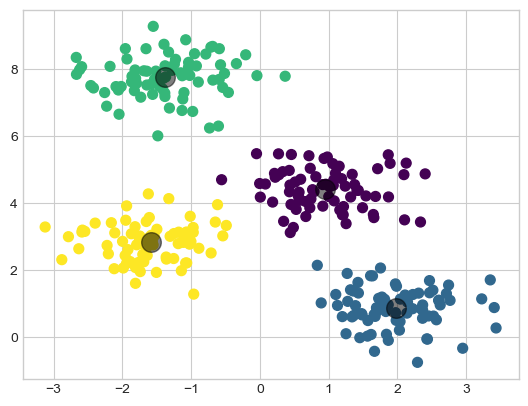

In [4]:
kmeans = KMeans(n_clusters=4, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Mostra i risultati con uno scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

Possiamo anche valutare la bontà del clustering usando la Dissimilarity Matrix.

**Otteniamo i centroidi di ciascun cluster**

In [5]:
clus_cent=kmeans.cluster_centers_
clus_cent

array([[ 0.94973532,  4.41906906],
       [ 1.98258281,  0.86771314],
       [-1.37324398,  7.75368871],
       [-1.58438467,  2.83081263]])

**Otteniamo gli assegnamenti di ciascun punto**

In [6]:
kmeans.labels_

array([1, 2, 0, 2, 1, 1, 3, 0, 2, 2, 3, 2, 0, 2, 1, 0, 0, 1, 3, 3, 1, 1,
       0, 3, 3, 0, 1, 0, 3, 0, 2, 2, 0, 2, 2, 2, 2, 2, 3, 1, 0, 3, 0, 0,
       3, 3, 2, 3, 2, 1, 3, 1, 2, 1, 1, 3, 2, 3, 2, 1, 2, 0, 2, 3, 3, 3,
       2, 1, 2, 3, 0, 3, 2, 3, 3, 2, 3, 0, 1, 2, 1, 0, 1, 1, 2, 0, 1, 0,
       2, 2, 0, 1, 2, 3, 3, 0, 1, 1, 0, 3, 2, 1, 2, 1, 0, 1, 1, 0, 2, 0,
       3, 3, 1, 2, 1, 0, 2, 1, 1, 0, 3, 1, 3, 1, 1, 1, 1, 3, 1, 3, 2, 3,
       3, 1, 2, 3, 3, 2, 0, 2, 2, 3, 0, 3, 0, 3, 2, 0, 2, 2, 2, 0, 2, 0,
       1, 3, 2, 3, 1, 0, 2, 0, 0, 1, 0, 3, 3, 0, 1, 0, 0, 2, 1, 0, 3, 2,
       1, 1, 0, 3, 1, 0, 3, 3, 0, 0, 0, 0, 1, 2, 0, 3, 0, 0, 3, 3, 3, 0,
       3, 2, 0, 3, 1, 3, 0, 2, 3, 2, 0, 2, 0, 3, 0, 0, 2, 3, 3, 1, 1, 0,
       2, 1, 1, 3, 1, 3, 0, 2, 2, 0, 0, 2, 0, 1, 3, 0, 1, 3, 2, 3, 1, 0,
       1, 2, 2, 2, 2, 3, 3, 2, 0, 3, 1, 0, 3, 3, 3, 1, 1, 2, 0, 0, 3, 1,
       2, 3, 0, 2, 0, 1, 1, 3, 3, 0, 1, 1, 1, 0, 2, 2, 1, 1, 0, 1, 1, 1,
       2, 3, 2, 0, 1, 1, 2, 2, 2, 1, 1, 0, 2, 3], d

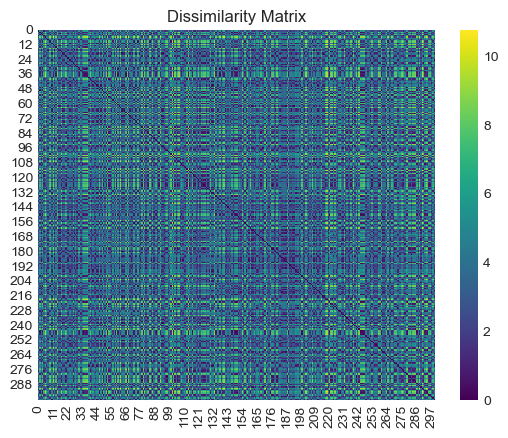

In [7]:
from sklearn.metrics import pairwise_distances
import seaborn as sns

distances = pairwise_distances(X)
sns.heatmap(distances, cmap='viridis')
plt.title('Dissimilarity Matrix')
plt.show()

Cluster omogenei dovrebbero essere rappresentati come regioni scure sulla diagonale della matrice. Gli elementi della matrice più luminosi rappresentano i punti del dataset che sono più lontani tra loro.

## Valutiamo le capacità di K-Means su diversi distribuzioni di dati

In [8]:
import sklearn.datasets
np.random.seed(0)
# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500

# Circles
noisy_circles = sklearn.datasets.make_circles(
    n_samples=n_samples,
    # Scale factor between inner and outer circle
    factor=.5,
    # Gaussian noise added to each point
    noise=.05)

# Moons
noisy_moons = sklearn.datasets.make_moons(n_samples=n_samples,
                                          noise=.05)

# Blobs
blobs = sklearn.datasets.make_blobs(n_samples=n_samples, random_state=8, cluster_std=1)

# Uniform square
no_structure = (np.random.uniform(size=(n_samples, 2)), None)

# Anisotropically distributed data
random_state = 170
X, y = sklearn.datasets.make_blobs(n_samples=n_samples, random_state=random_state, cluster_std=1)
# Changes how x1, x2 coordinates are shifted
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = sklearn.datasets.make_blobs(n_samples=n_samples,
                                     cluster_std=[1.0, 2.5, 0.5],
                                     random_state=random_state)

# ============
# Associate each dataset with the correct # of clusters
# ============

default_base = {'n_clusters': 3}

generated_datasets = [
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (varied,      {}),
    (aniso,       {}),
    (blobs, {}),
    (no_structure, {})]

**Visualizziamo la groud truth**

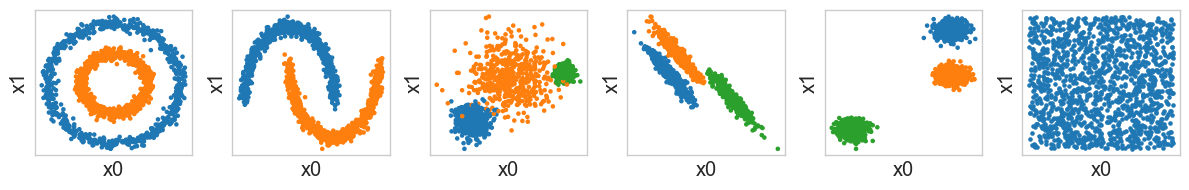

In [9]:
import scprep

fig, axes = plt.subplots(1,6,figsize=(12,2))

for i, (dataset, _) in enumerate(generated_datasets):
    ax = axes[i]
    X, y = dataset

    # normalize dataset for easier parameter selection
    X = sklearn.preprocessing.StandardScaler().fit_transform(X)
    scprep.plot.scatter2d(X, c=y,
                          ticks=None, ax=ax,
                          xlabel='x0', ylabel='x1',
                         legend=False)

fig.tight_layout()

/var/folders/d2/t7yz1tvn4q96z1st5_f71cgr0000gn/T/ipykernel_9484/860225454.py:2: DeprecationWarning: This package has been superseded by the `leidenalg` package and will no longer be maintained. Please upgrade to the `leidenalg` package.
  import louvain
/Users/davide/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/davide/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/davide/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as 

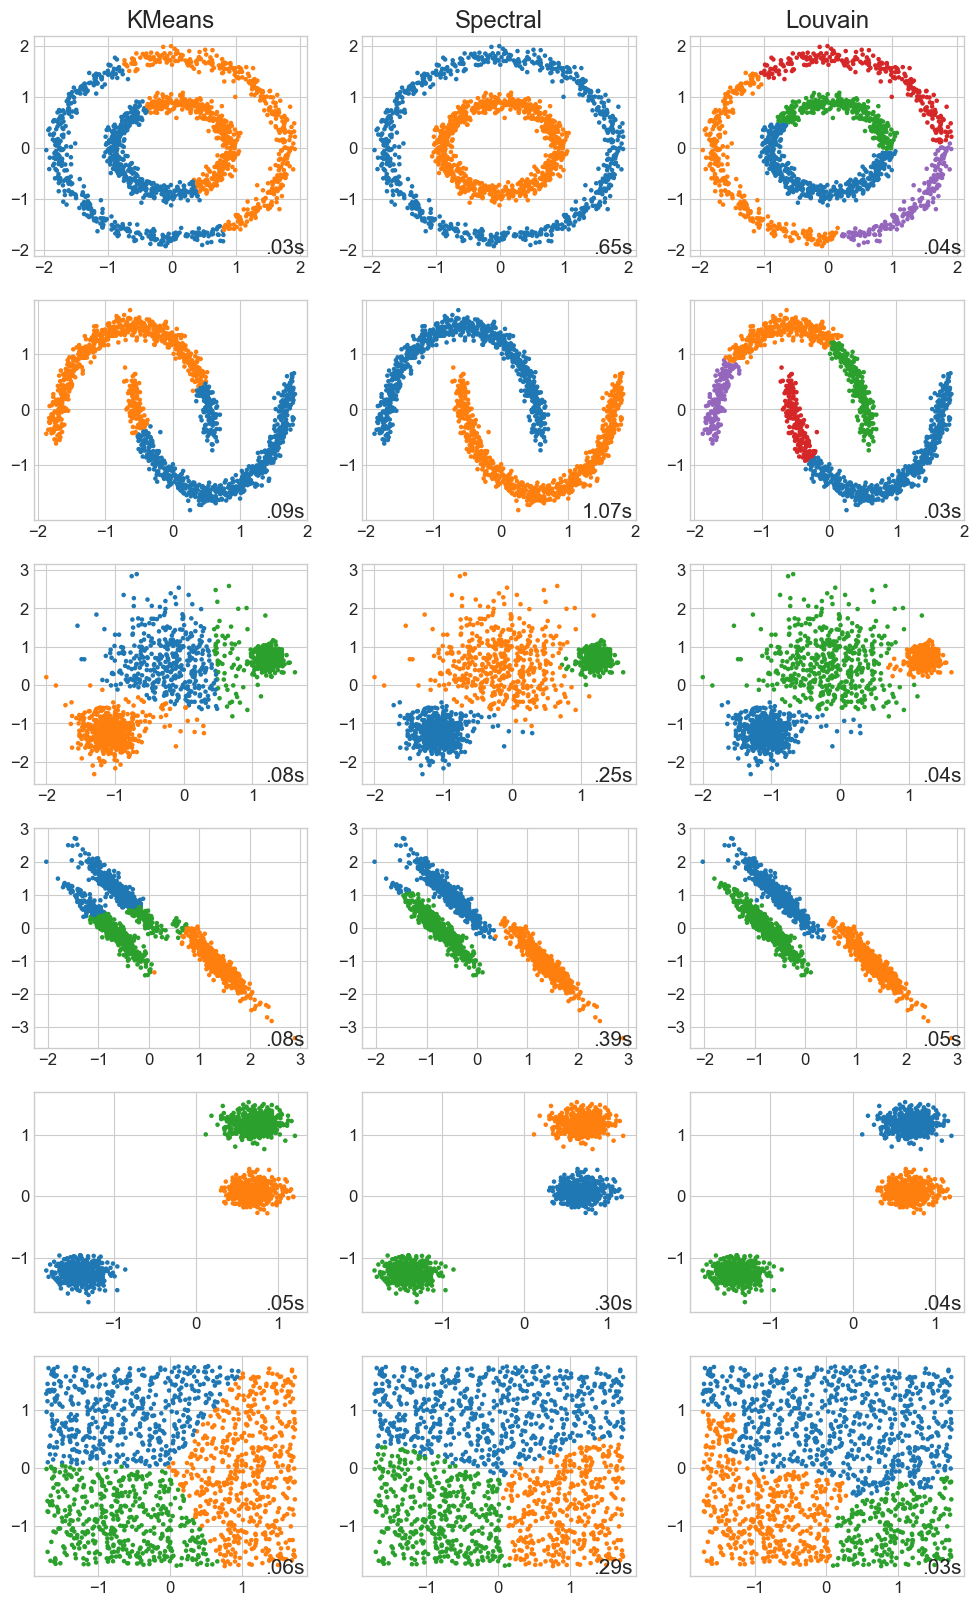

In [10]:
import time
import louvain
import graphtools as gt

fig, axes = plt.subplots(6,3, figsize=(12, 20))
plot_title = True

for i_dataset, (dataset, cluster_params) in enumerate(generated_datasets):
    # update cluster parameters with dataset-specific values
    params = default_base.copy()
    params.update(cluster_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = sklearn.preprocessing.StandardScaler().fit_transform(X)


    # ============
    # Run clustering algorithms
    # ============
    clusters = []
    titles = []
    times = []
    # KMeans
    tic = time.time()
    kmeans = sklearn.cluster.KMeans(n_clusters=params['n_clusters'])
    clusters.append(kmeans.fit_predict(X))
    titles.append('KMeans')
    times.append(time.time() - tic)

    # Spectral Clustering
    tic = time.time()
    spectral = sklearn.cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")
    clusters.append(spectral.fit_predict(X))
    titles.append('Spectral')
    times.append(time.time() - tic)


    # Louvain
    tic = time.time()
    G = gt.Graph(X)
    G_igraph = G.to_igraph()
    part = louvain.find_partition(G_igraph, louvain.RBConfigurationVertexPartition,
                                  weights="weight", resolution_parameter=0.01)
    clusters.append(np.array(part.membership))
    titles.append('Louvain')
    times.append(time.time() - tic)

    # ============
    # Plot clustering results for dataset
    # ============
    row_axes = axes[i_dataset]

    for i, ax in enumerate(row_axes.flatten()):
        curr_cluster = clusters[i]
        if plot_title:
            curr_title = '{}'.format(titles[i])
        else:
            curr_title = None

        scprep.plot.scatter2d(X, c=curr_cluster, title=curr_title, ax=ax,
                             legend=False, discrete=True)

        # Plot time to run algorithm
        plt.text(.99, .01, ('%.2fs' % (times[i])).lstrip('0'),
                 transform=ax.transAxes, size=15,
                 horizontalalignment='right')
    plot_title=False
fig.tight_layout()

## Silhouette
Oltre all'inerzia, che però è soggetta a diminuire in funzione dell'aumentare del numero di cluster, per validare un metodo di clustering si possono solitamente utilizzare due criteri: la **distanza intercluster** e la **distanza intracluster**.

E di conseguenza unire il tutto all'interno della misura Silhouette:
$$Silhouette(x) = \frac{b(x)-a(x)}{max(b(x),a(x))}$$
dove
- a(x) è la distanza media tra x e tutti gli altri punti all'interno del cluster
- b(x) è il minimo delle distanze medie tra x e i punti negli altri cluster


<img src=https://exeter-data-analytics.github.io/MachineLearning/_img/02-clustering.png style="width: 500px;"/>


For n_clusters = 2 The average silhouette_score is : 0.5426422297358303
For n_clusters = 3 The average silhouette_score is : 0.5890390393551768
For n_clusters = 4 The average silhouette_score is : 0.6819938690643478
For n_clusters = 5 The average silhouette_score is : 0.5923875148758644
For n_clusters = 6 The average silhouette_score is : 0.4921949007702392


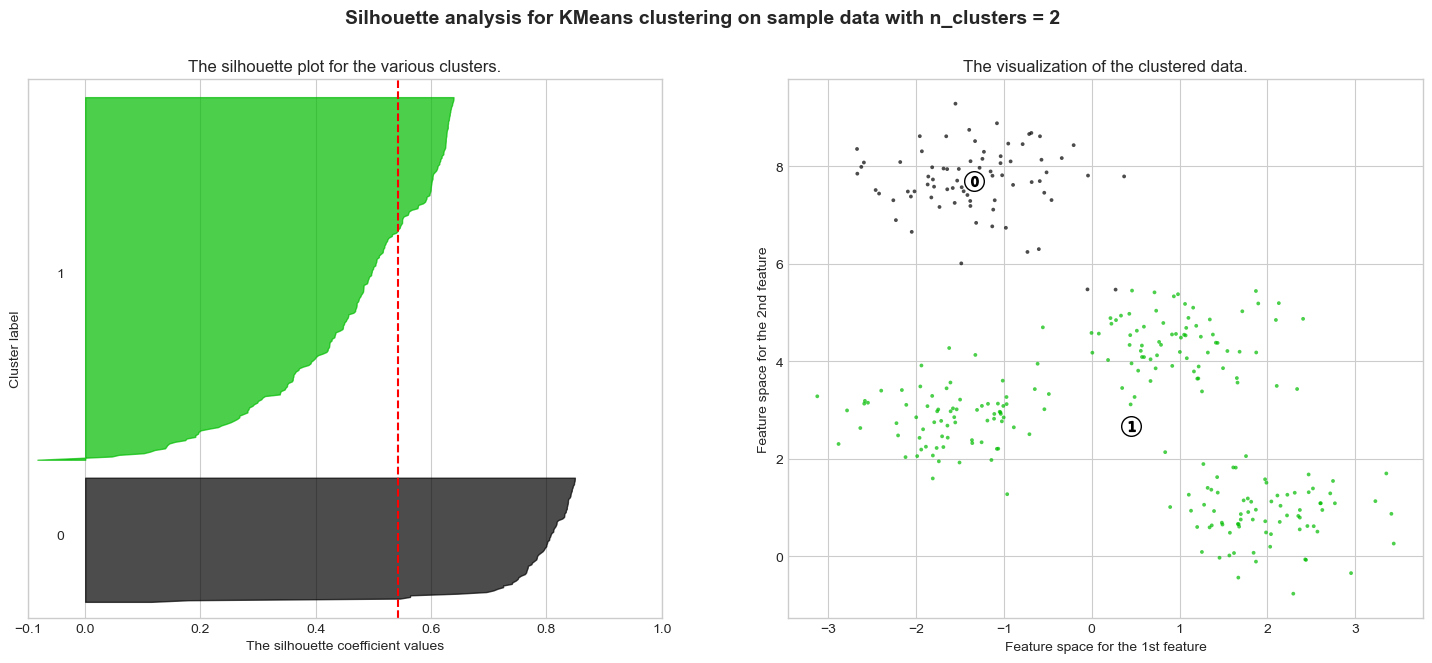

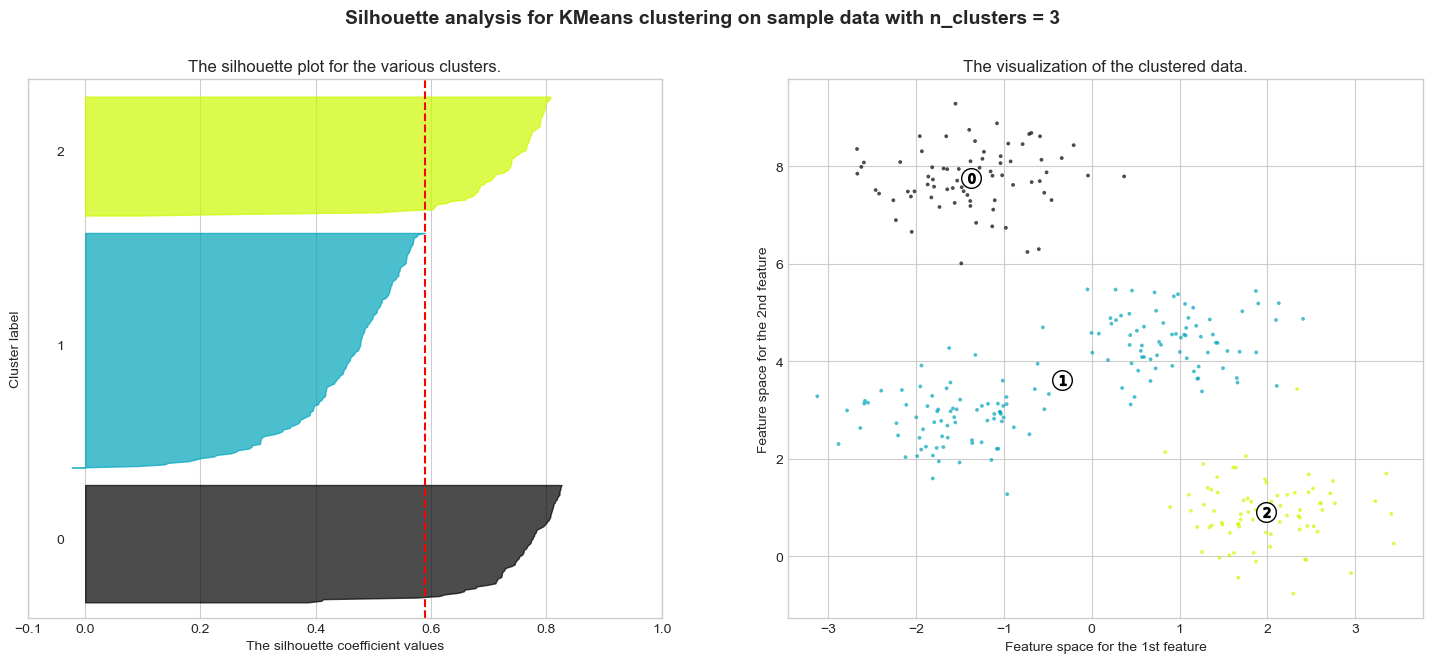

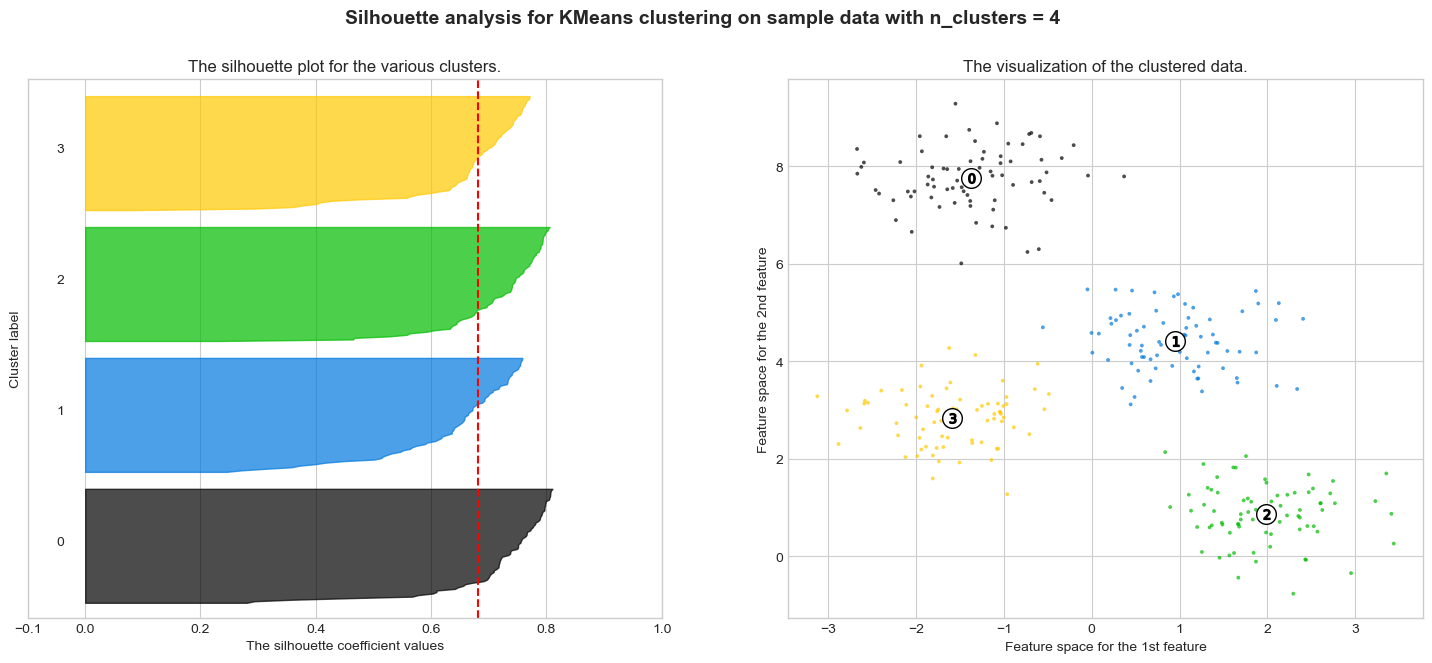

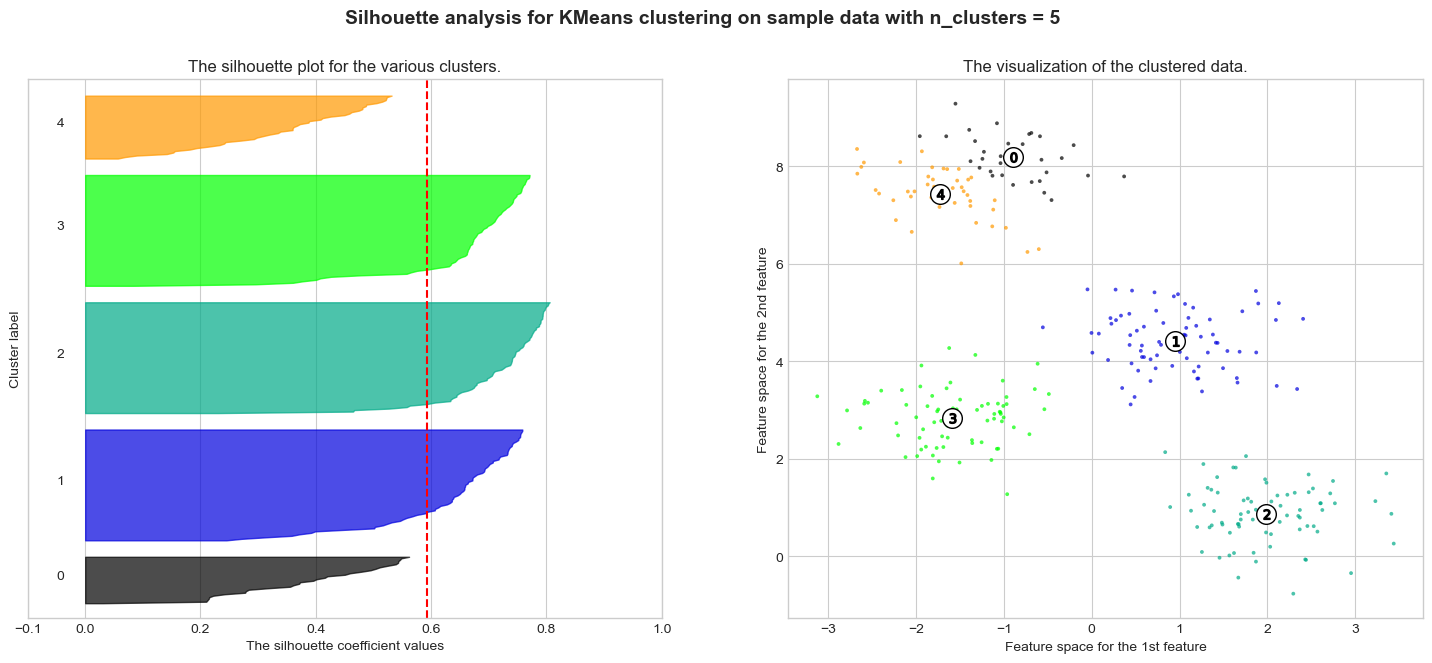

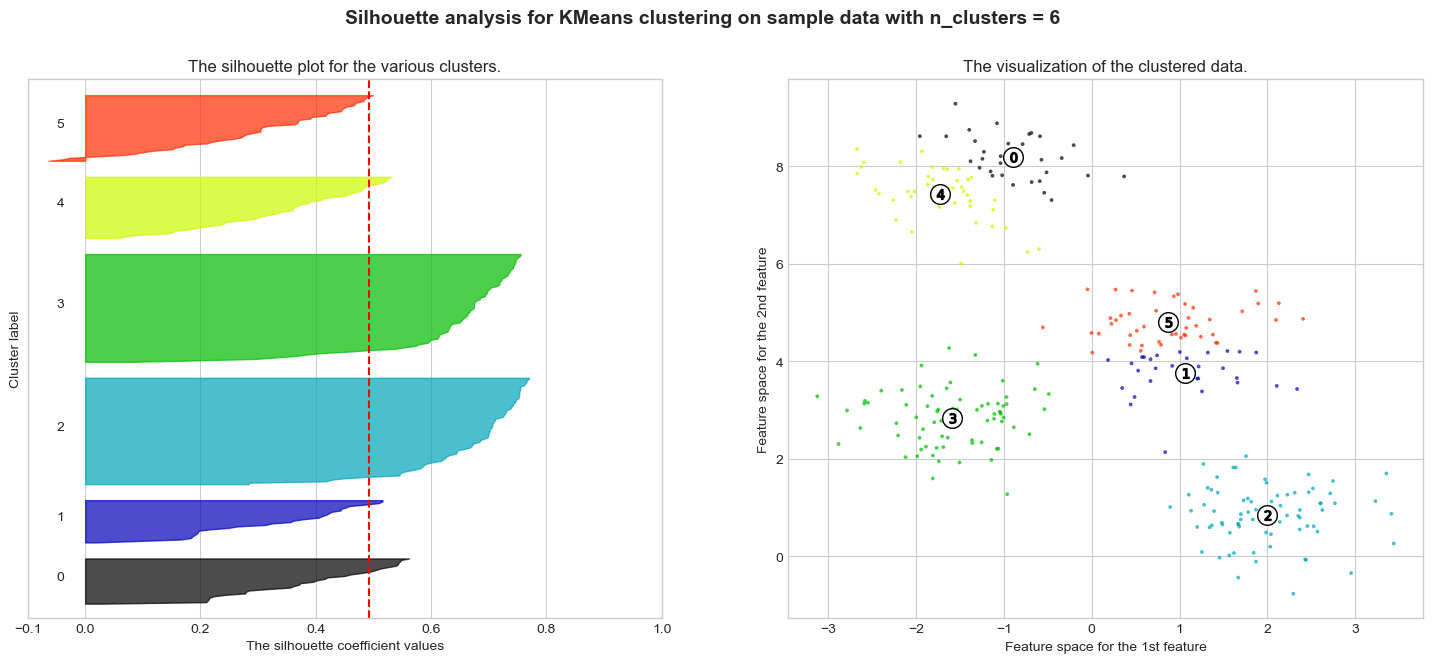

In [11]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

# Assignment

Verificare le capacità di k-Means di effettuare un buon clustering sul dataset Iris, valutando le performance rispetto alla ground truth.